In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

In [12]:
orgfile=f'{bigDir}\signals_org_v4.csv'
newfile=f'{bigDir}\\new dataset\signals_new_v4.csv'
file=f'{bigDir}\signals_combined_v2.csv'

In [13]:
orgdata=pd.read_csv(orgfile)
newdata=pd.read_csv(newfile)
data=pd.read_csv(file)

# data visualizations - new dataset

In [14]:
newdata=newdata.drop(columns=['Unnamed: 0'])

In [15]:
newdata.head()

file original cell name                       movie  \
0  20191203_cell-01.czi     20191125-01-20  191125pcnat_dhbr_cdc6vxy01   
1  20191203_cell-03.czi     20191125-01-25  191125pcnat_dhbr_cdc6vxy01   
2  20191203_cell-05.czi     20191125-01-36  191125pcnat_dhbr_cdc6vxy01   
3  20191203_cell-08.czi     20191125-01-41  191125pcnat_dhbr_cdc6vxy01   
4  20191203_cell-11.czi     20191125-01-54  191125pcnat_dhbr_cdc6vxy01   

   last frame movie position x  last frame movie position y ab1 (MCM)  ab1 ch  \
0                     1552.152                      240.479      MCM3       1   
1                     1650.585                      324.968      MCM3       1   
2                     1705.099                      468.246      MCM3       1   
3                      332.674                      553.990      MCM3       1   
4                      647.356                      843.150      MCM3       1   

  ab2 (heterochromatin)  ab2 ch  DAPI ch  ...  nuc_DAPI_het inner_DAPI_het  \
0               HP1beta       2        3  ...    1812074514     1086345328   
1               HP1beta       2        3  ...    1229128157      590797501   
2               HP1beta       2        3  ...    1336272374      833565325   
3               HP1beta       2        3  ...     964331411      525832808   
4               HP1beta       2        3  ...     915332396      370723745   

   outer_DAPI_het  nuc_DAPI_eu inner_DAPI_eu  outer_DAPI_eu        day  decon  \
0       725729186   5857210228    2088246298     3768963930  d20191203  False   
1       638330656   3296613243     843647317     2452965926  d20191203  False   
2       502707049   3270042867    1088428286     2181614581  d20191203  False   
3       438498603   2862454954     878283999     1984170955  d20191203  False   
4       544608651   2672523986     700056649     1972467337  d20191203  False   

      p_age  mol_age_mod  
0       NaN        1.373  
1  1.500000        0.226  
2  2.166667        0.632  
3  5.833333        0.759  
4  6.666667        0.325  

[5 rows x 50 columns]

In [16]:
newdatasel=newdata.loc[((newdata.decon==True) & (newdata['ab2 (heterochromatin)']=='HP1beta')),:].copy()

In [17]:
newdatand=newdata.loc[((newdata.decon==False) & (newdata['ab2 (heterochromatin)']=='HP1beta')),:].copy()

In [72]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [135]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

# deconvolved

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


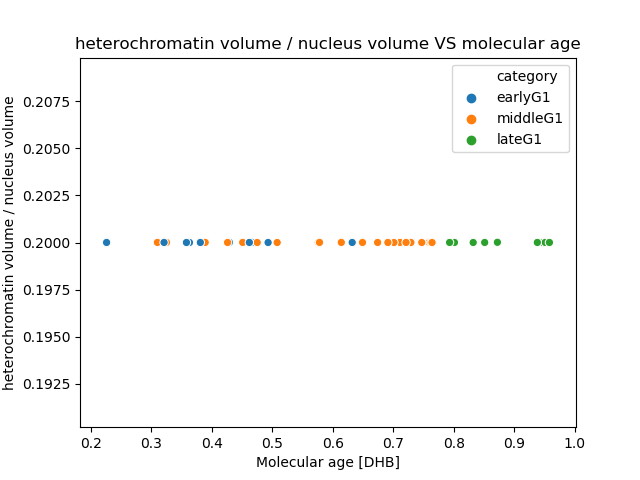

Text(0.5, 1.0, 'heterochromatin volume / nucleus volume VS molecular age')

In [74]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_vol_het/newdatasel.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age')

In [77]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#1', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


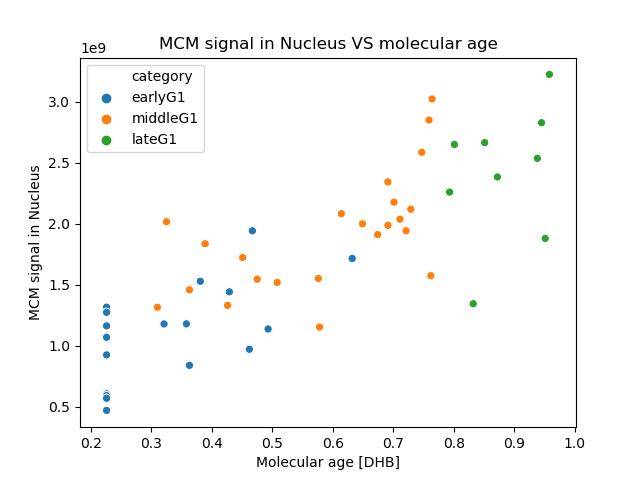

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [78]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

In [79]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#2', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


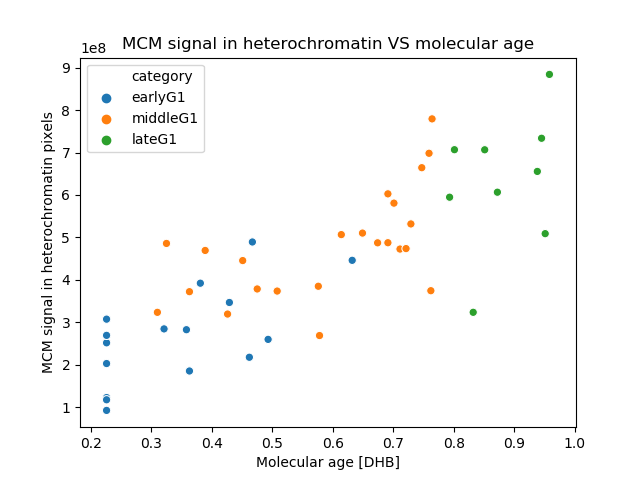

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [80]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

In [81]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


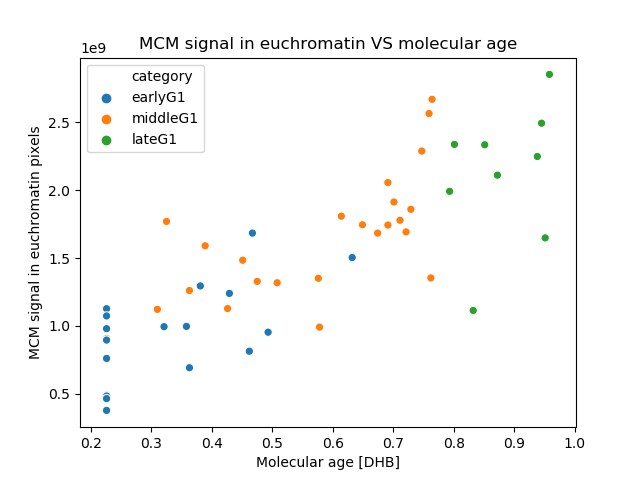

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [82]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

In [83]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#4', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


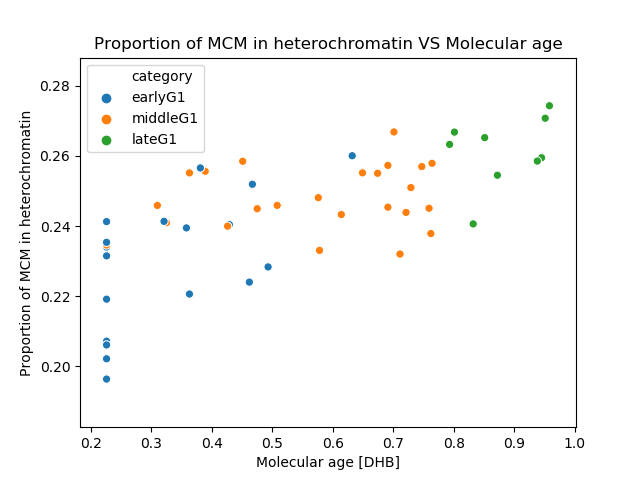

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [84]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_het/newdatasel.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

In [85]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#5', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


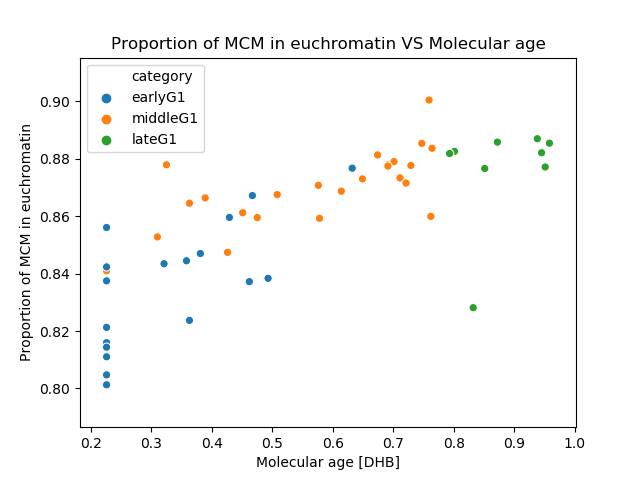

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [86]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_eu/newdatasel.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

In [87]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#6', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


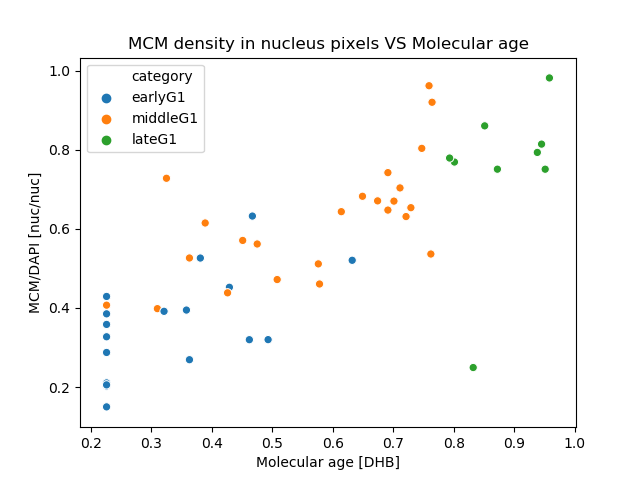

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [88]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_total/newdatasel.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

In [89]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#7', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


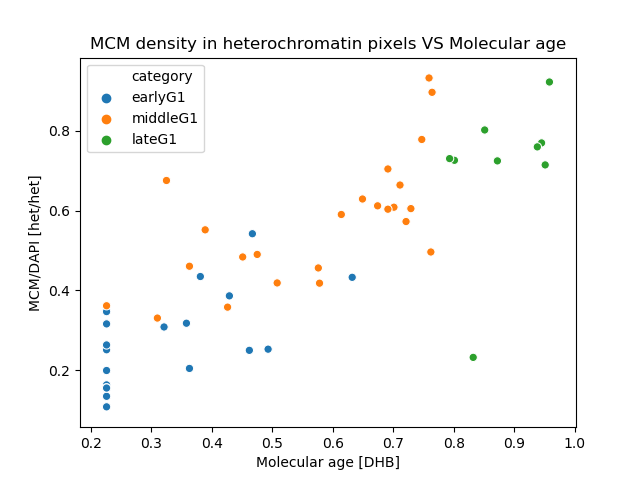

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [90]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_het/newdatasel.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

In [91]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#8', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


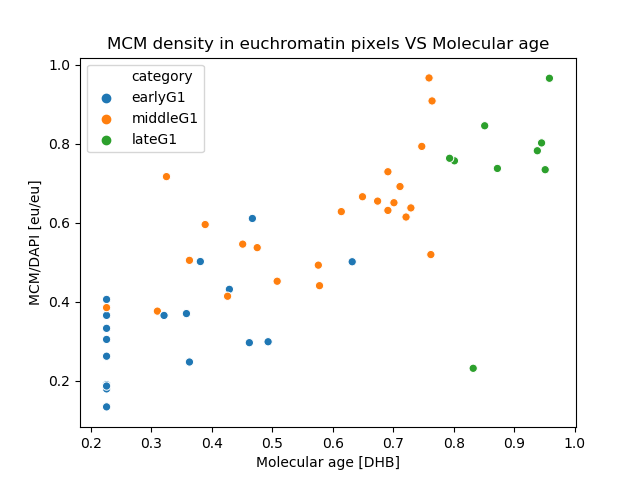

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [92]:
%matplotlib notebook
newdatasel['temp']=newdatasel.nuc_mcm_eu/newdatasel.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

In [93]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#9', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# inner core of the nucleus

## 10.	How is heterochromtin/nucleus inner volume changing with molecular age?

<IPython.core.display.Javascript object>


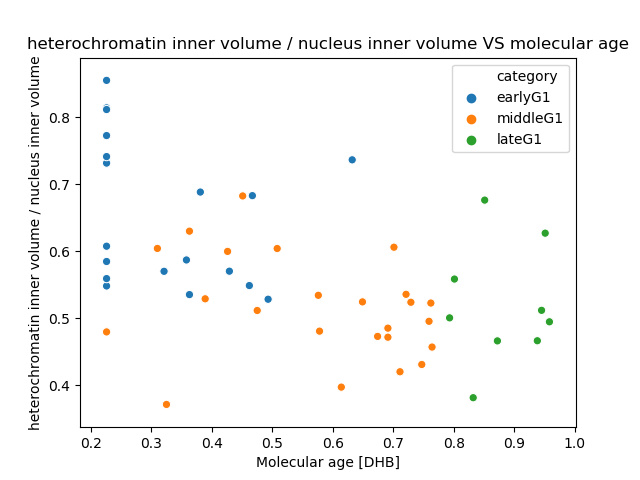

Text(0.5, 1.0, 'heterochromatin inner volume / nucleus inner volume VS molecular age')

In [94]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_vol_het/newdatasel.inner_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin inner volume / nucleus inner volume')
plt.title('heterochromatin inner volume / nucleus inner volume VS molecular age')

In [95]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#10', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 11. 	How is MCM signal in inner core changing with molecular age? 

<IPython.core.display.Javascript object>


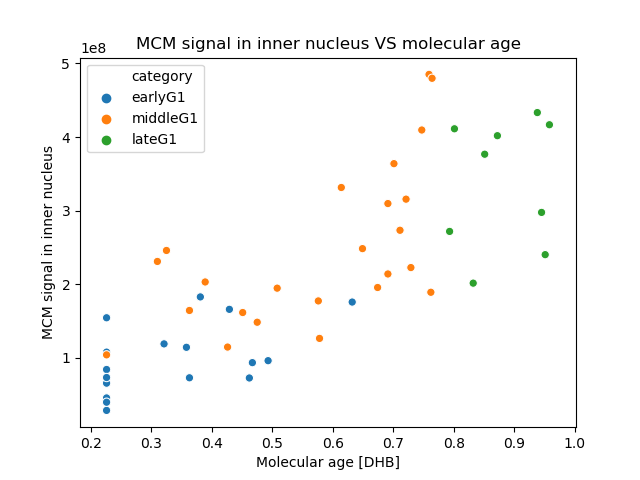

Text(0.5, 1.0, 'MCM signal in inner nucleus VS molecular age')

In [96]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_total',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner nucleus')
plt.title('MCM signal in inner nucleus VS molecular age')

In [97]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#11', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 12. 	How is MCM signal changing in inner heterochromatin with molecular age?

<IPython.core.display.Javascript object>


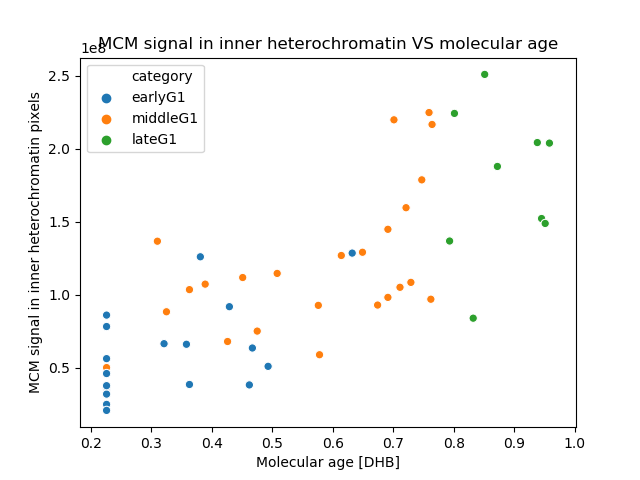

Text(0.5, 1.0, 'MCM signal in inner heterochromatin VS molecular age')

In [98]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_het',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner heterochromatin pixels')
plt.title('MCM signal in inner heterochromatin VS molecular age')

In [99]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#12', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 13. 	How is MCM signal changing in inner euchromatin with molecular age?

<IPython.core.display.Javascript object>


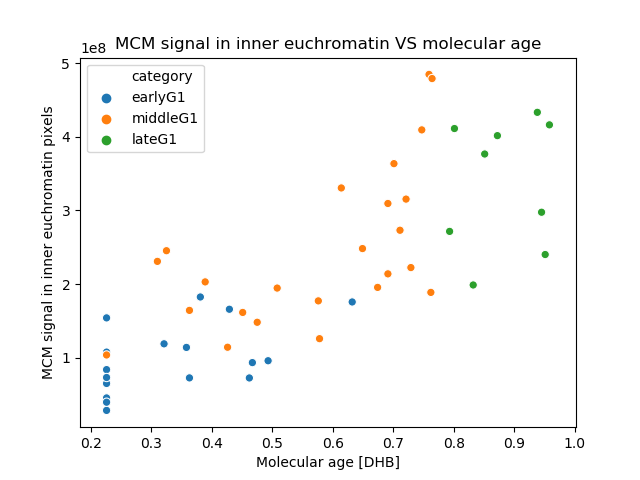

Text(0.5, 1.0, 'MCM signal in inner euchromatin VS molecular age')

In [100]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_eu',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner euchromatin pixels')
plt.title('MCM signal in inner euchromatin VS molecular age')

In [101]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#13', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 14.	How does a proportion of MCM loaded in inner heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


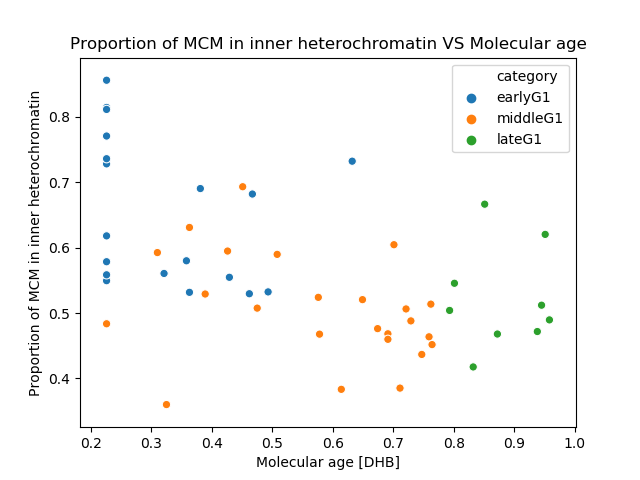

Text(0.5, 1.0, 'Proportion of MCM in inner heterochromatin VS Molecular age')

In [102]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_het/newdatasel.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner heterochromatin')
plt.title('Proportion of MCM in inner heterochromatin VS Molecular age')

In [103]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#14', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 15.	How does a proportion of MCM loaded in inner euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


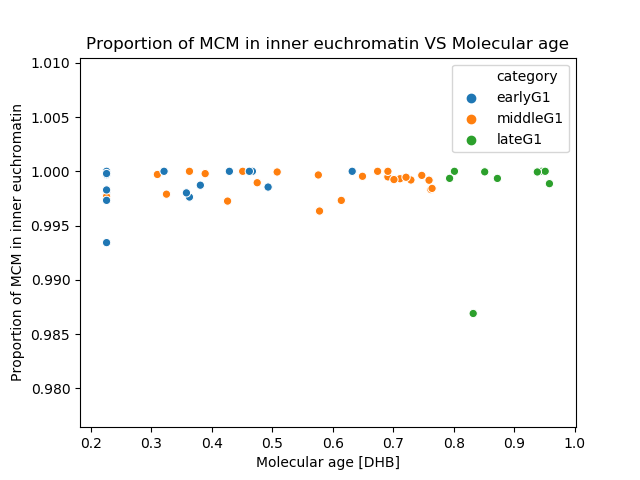

Text(0.5, 1.0, 'Proportion of MCM in inner euchromatin VS Molecular age')

In [104]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_eu/newdatasel.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner euchromatin')
plt.title('Proportion of MCM in inner euchromatin VS Molecular age')

In [105]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#15', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 16.	How does MCM/DAPI in inner core changes in molecular time?

<IPython.core.display.Javascript object>


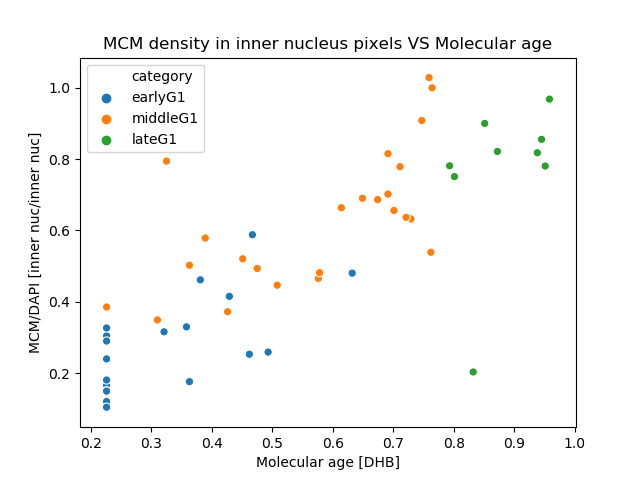

Text(0.5, 1.0, 'MCM density in inner nucleus pixels VS Molecular age')

In [106]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_total/newdatasel.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [inner nuc/inner nuc]')
plt.title('MCM density in inner nucleus pixels VS Molecular age')

In [107]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#16', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 17.	How does MCM/DAPI changes in inner heterochromatin molecular time?

<IPython.core.display.Javascript object>


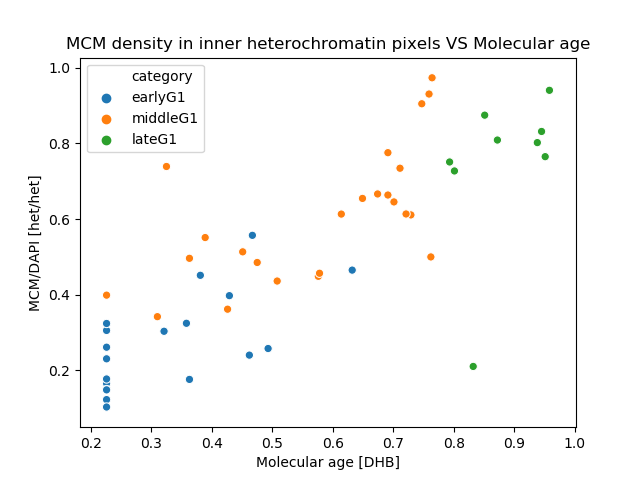

Text(0.5, 1.0, 'MCM density in inner heterochromatin pixels VS Molecular age')

In [108]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_het/newdatasel.inner_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in inner heterochromatin pixels VS Molecular age')

In [109]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#17', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 18. 	How does MCM/DAPI changes in inner euterochromatin molecular time?

<IPython.core.display.Javascript object>


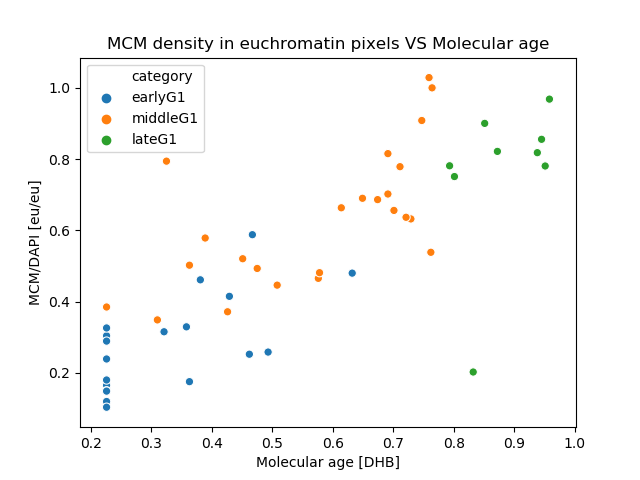

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [110]:
%matplotlib notebook
newdatasel['temp']=newdatasel.inner_mcm_eu/newdatasel.inner_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

In [111]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#18', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# outer shell of the nucleus

## 19.	How is heterochromtin/nucleus outer volume changing with molecular age?

<IPython.core.display.Javascript object>


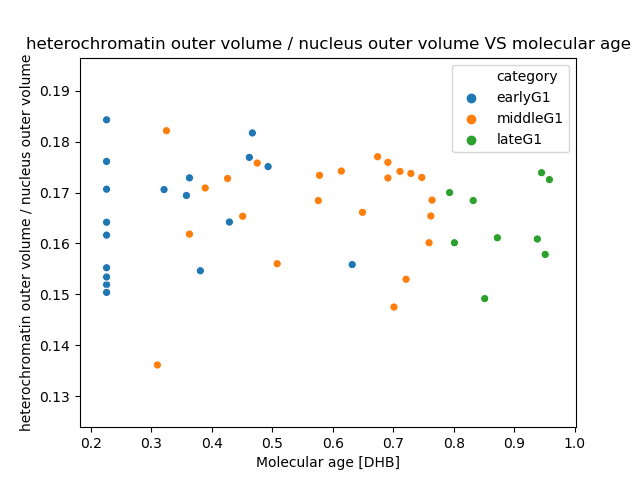

Text(0.5, 1.0, 'heterochromatin outer volume / nucleus outer volume VS molecular age')

In [112]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_vol_het/newdatasel.outer_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin outer volume / nucleus outer volume')
plt.title('heterochromatin outer volume / nucleus outer volume VS molecular age')

In [113]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#19', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 20. 	How is MCM signal in outer shell changing with molecular age? 

<IPython.core.display.Javascript object>


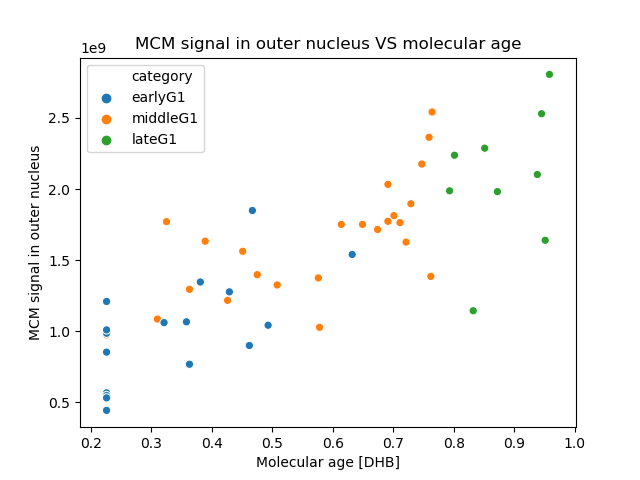

Text(0.5, 1.0, 'MCM signal in outer nucleus VS molecular age')

In [114]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_total',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer nucleus')
plt.title('MCM signal in outer nucleus VS molecular age')

In [115]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#20', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 21. 	How is MCM signal changing in outer heterochromatin with molecular age?

<IPython.core.display.Javascript object>


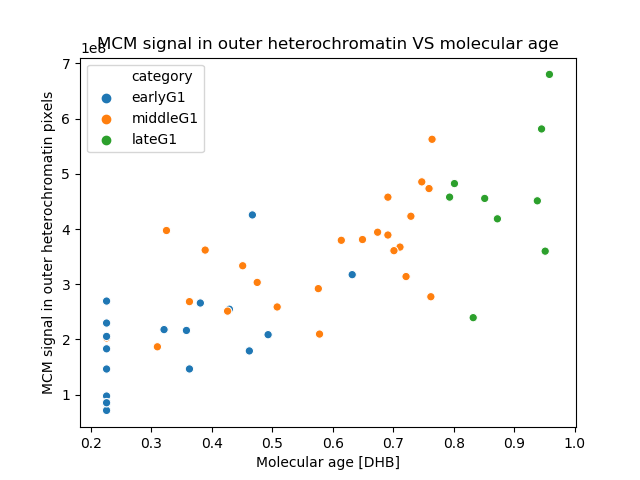

Text(0.5, 1.0, 'MCM signal in outer heterochromatin VS molecular age')

In [116]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_het',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer heterochromatin pixels')
plt.title('MCM signal in outer heterochromatin VS molecular age')

In [117]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#21', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 22. 	How is MCM signal changing in outer euchromatin with molecular age?

<IPython.core.display.Javascript object>


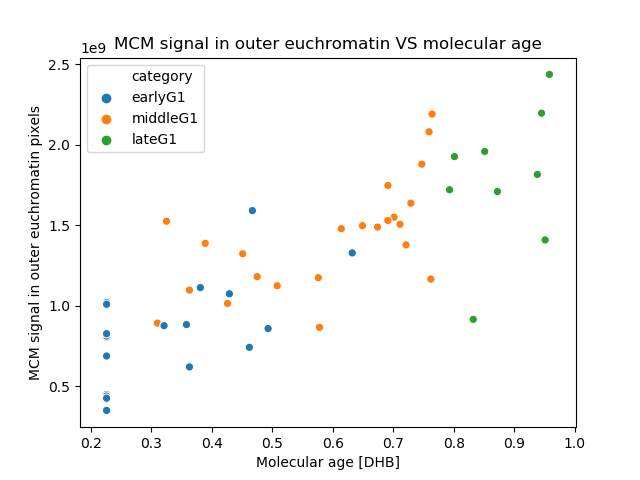

Text(0.5, 1.0, 'MCM signal in outer euchromatin VS molecular age')

In [118]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_eu',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer euchromatin pixels')
plt.title('MCM signal in outer euchromatin VS molecular age')

In [119]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#22', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 23.	How does a proportion of MCM loaded in outer heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


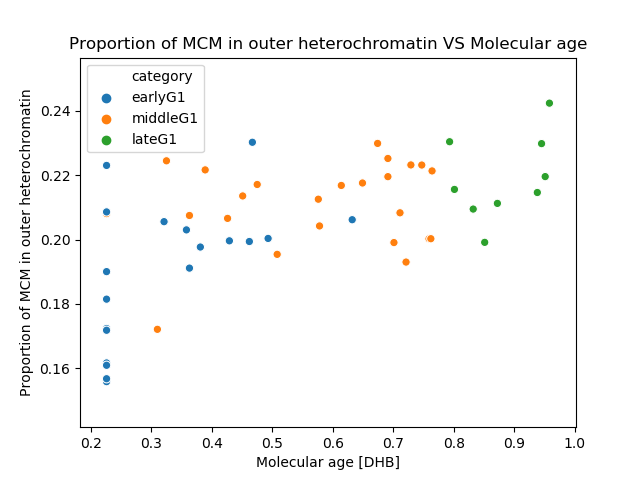

Text(0.5, 1.0, 'Proportion of MCM in outer heterochromatin VS Molecular age')

In [120]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_het/newdatasel.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatasel.loc[['G1' in x for x in newdatasel.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer heterochromatin')
plt.title('Proportion of MCM in outer heterochromatin VS Molecular age')

In [121]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#23', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 24.	How does a proportion of MCM loaded in outer euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


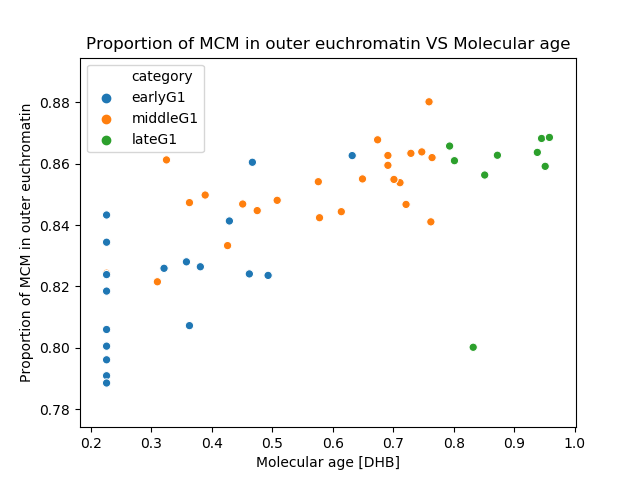

Text(0.5, 1.0, 'Proportion of MCM in outer euchromatin VS Molecular age')

In [122]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_eu/newdatasel.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer euchromatin')
plt.title('Proportion of MCM in outer euchromatin VS Molecular age')

In [123]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#24', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 25.	How does MCM/DAPI in outer shell changes in molecular time?

<IPython.core.display.Javascript object>


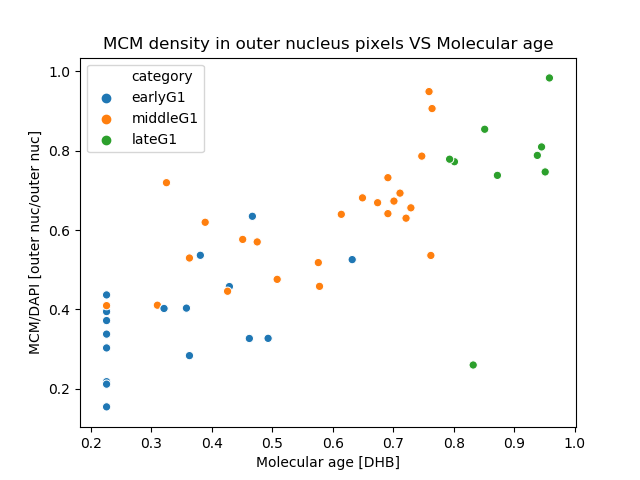

Text(0.5, 1.0, 'MCM density in outer nucleus pixels VS Molecular age')

In [124]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_total/newdatasel.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [outer nuc/outer nuc]')
plt.title('MCM density in outer nucleus pixels VS Molecular age')

In [125]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#25', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 26.	How does MCM/DAPI changes in outer heterochromatin molecular time?

<IPython.core.display.Javascript object>


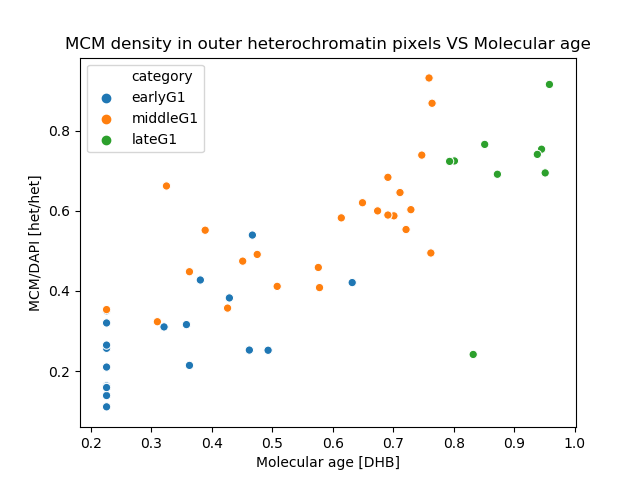

Text(0.5, 1.0, 'MCM density in outer heterochromatin pixels VS Molecular age')

In [126]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_het/newdatasel.outer_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in outer heterochromatin pixels VS Molecular age')

In [127]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#26', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 27. 	How does MCM/DAPI changes in outer euterochromatin molecular time?

<IPython.core.display.Javascript object>


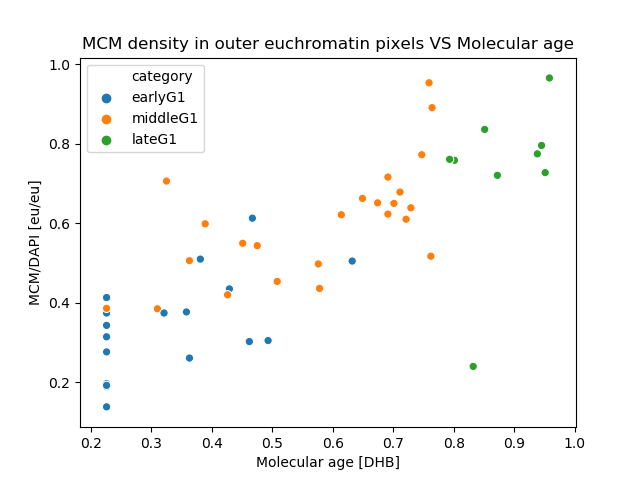

Text(0.5, 1.0, 'MCM density in outer euchromatin pixels VS Molecular age')

In [128]:
%matplotlib notebook
newdatasel['temp']=newdatasel.outer_mcm_eu/newdatasel.outer_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatasel.loc[['G1' in x for x in newdatasel.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in outer euchromatin pixels VS Molecular age')

In [129]:
x = np.array(newdatasel.mol_age_mod)
y = np.array(newdatasel.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#27', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

# non-deconvolved

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


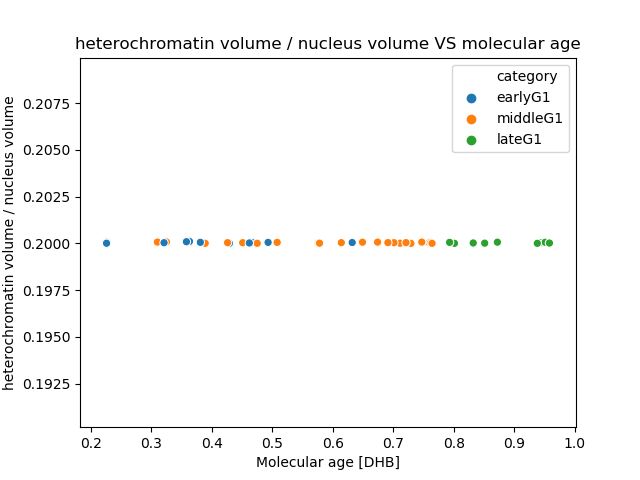

Text(0.5, 1.0, 'heterochromatin volume / nucleus volume VS molecular age')

In [136]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_vol_het/newdatand.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volume / nucleus volume VS molecular age')

In [137]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendData=myTrendData.append(pd.Series(['#27', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


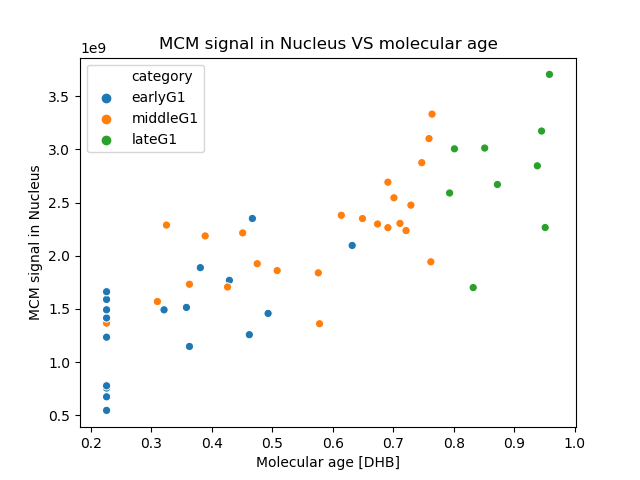

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [138]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

In [139]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#2', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


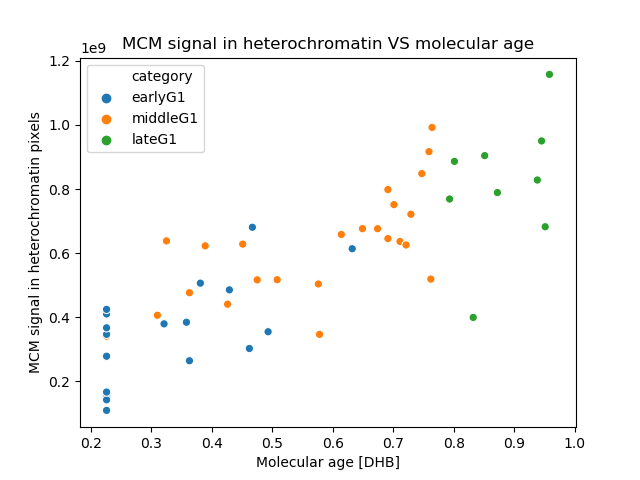

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [140]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

In [141]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


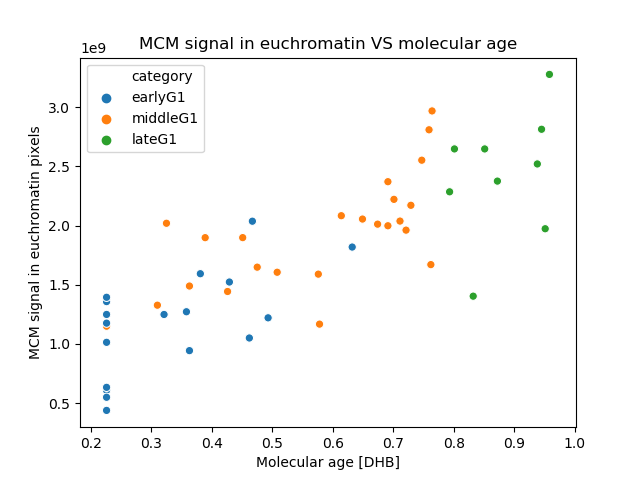

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [142]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

In [143]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#4', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


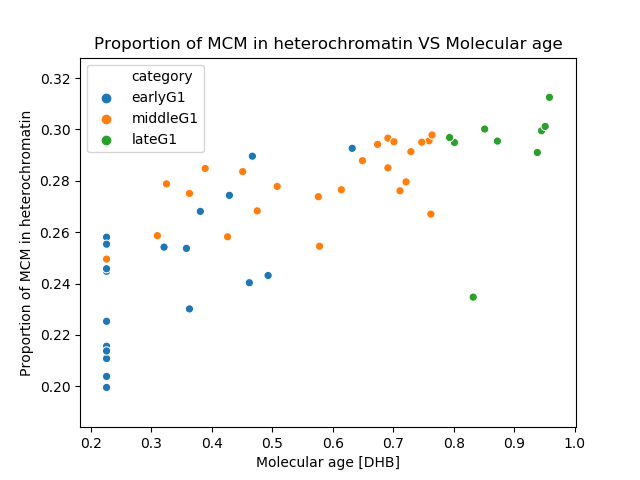

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [144]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_het/newdatand.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

In [145]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#5', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


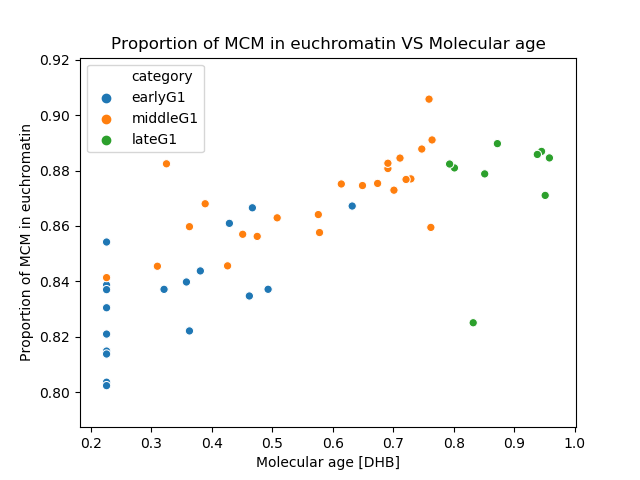

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [146]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_eu/newdatand.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

In [147]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#6', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


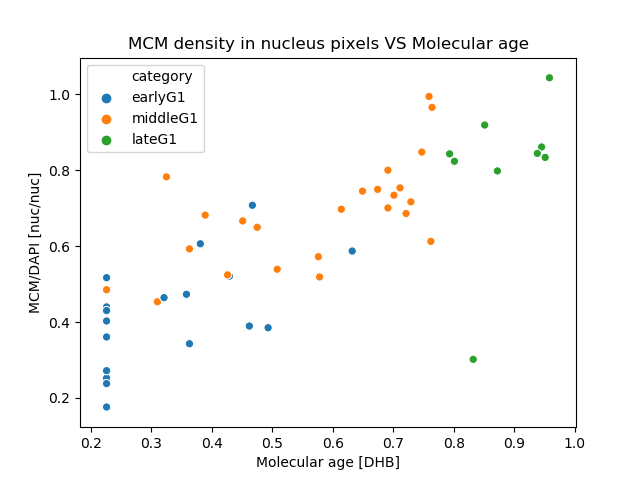

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [148]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_total/newdatand.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

In [149]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#7', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


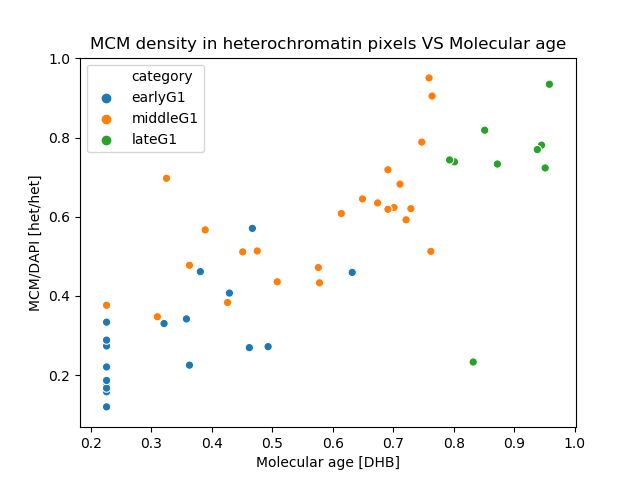

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [150]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_het/newdatand.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

In [151]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#8', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


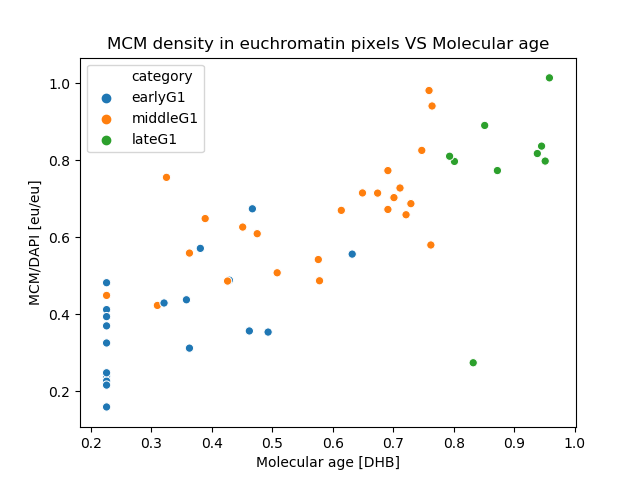

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [152]:
%matplotlib notebook
newdatand['temp']=newdatand.nuc_mcm_eu/newdatand.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

In [153]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#9', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

# inner core of the nucleus

## 10.	How is heterochromtin/nucleus inner volume changing with molecular age?

<IPython.core.display.Javascript object>


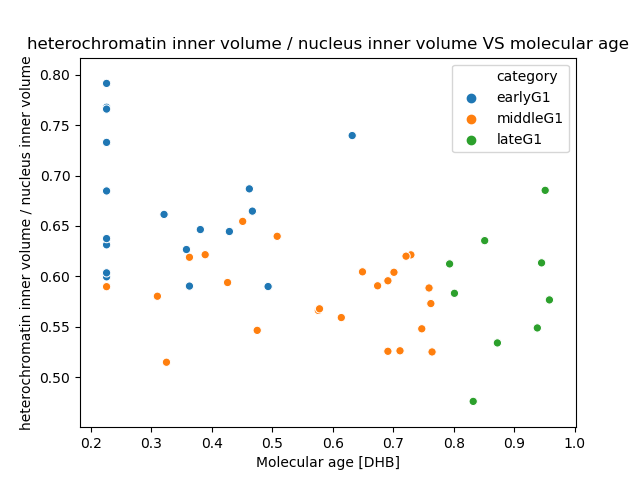

Text(0.5, 1.0, 'heterochromatin inner volume / nucleus inner volume VS molecular age')

In [154]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_vol_het/newdatand.inner_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin inner volume / nucleus inner volume')
plt.title('heterochromatin inner volume / nucleus inner volume VS molecular age')

In [155]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#10', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 11. 	How is MCM signal in inner core changing with molecular age? 

<IPython.core.display.Javascript object>


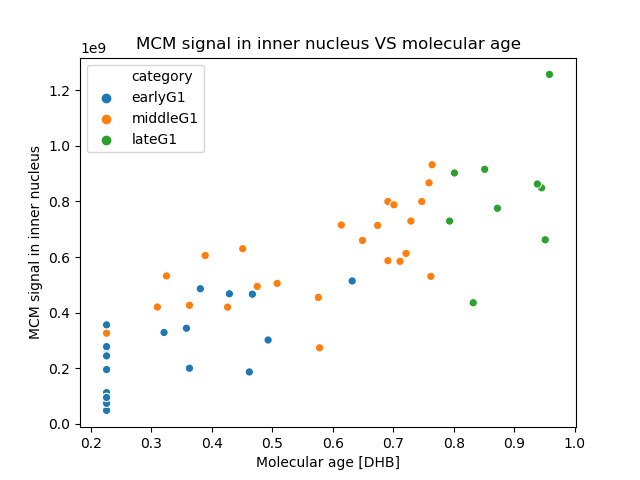

Text(0.5, 1.0, 'MCM signal in inner nucleus VS molecular age')

In [156]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_total',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner nucleus')
plt.title('MCM signal in inner nucleus VS molecular age')

In [157]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#11', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 12. 	How is MCM signal changing in inner heterochromatin with molecular age?

<IPython.core.display.Javascript object>


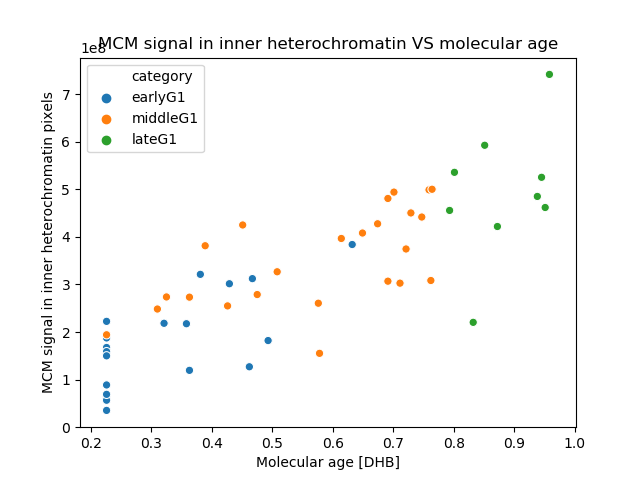

Text(0.5, 1.0, 'MCM signal in inner heterochromatin VS molecular age')

In [158]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_het',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner heterochromatin pixels')
plt.title('MCM signal in inner heterochromatin VS molecular age')

In [159]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#12', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 13. 	How is MCM signal changing in inner euchromatin with molecular age?

<IPython.core.display.Javascript object>


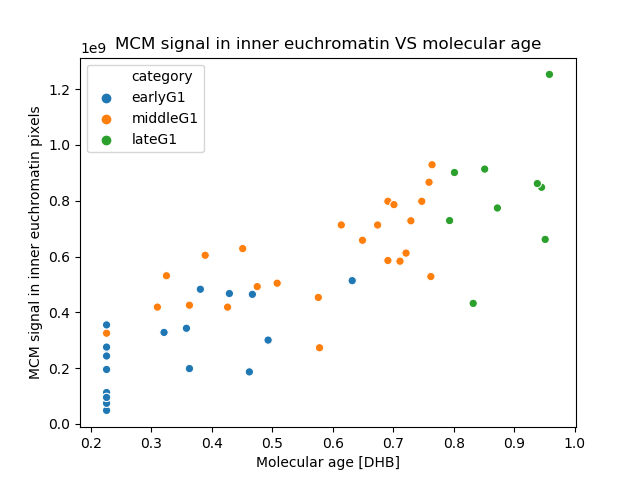

Text(0.5, 1.0, 'MCM signal in inner euchromatin VS molecular age')

In [160]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_eu',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner euchromatin pixels')
plt.title('MCM signal in inner euchromatin VS molecular age')

In [161]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#13', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 14.	How does a proportion of MCM loaded in inner heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


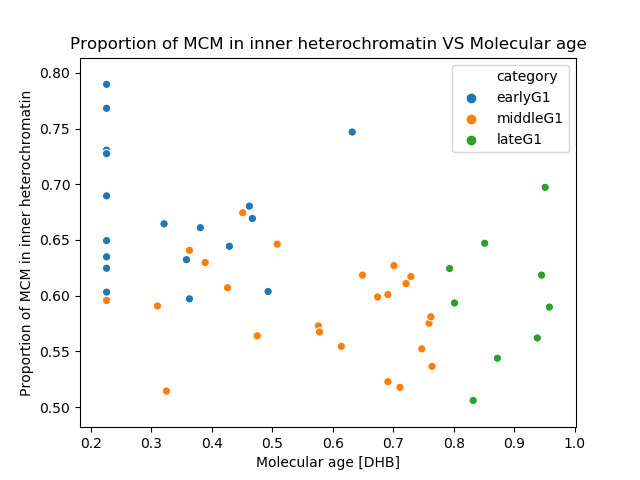

Text(0.5, 1.0, 'Proportion of MCM in inner heterochromatin VS Molecular age')

In [162]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_het/newdatand.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner heterochromatin')
plt.title('Proportion of MCM in inner heterochromatin VS Molecular age')

In [163]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#14', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 15.	How does a proportion of MCM loaded in inner euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


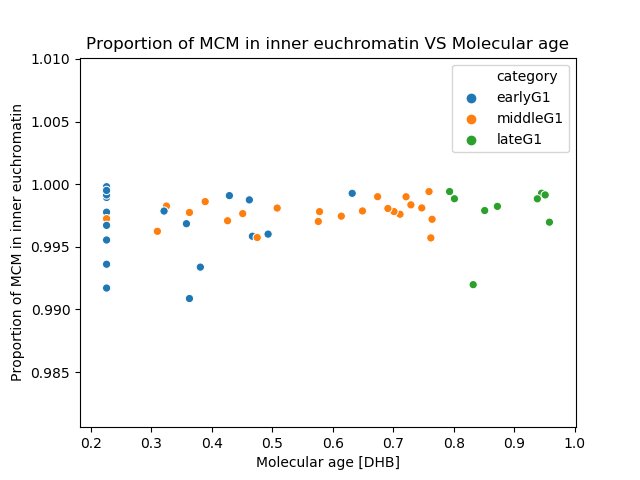

Text(0.5, 1.0, 'Proportion of MCM in inner euchromatin VS Molecular age')

In [164]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_eu/newdatand.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner euchromatin')
plt.title('Proportion of MCM in inner euchromatin VS Molecular age')

In [165]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#15', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 16.	How does MCM/DAPI in inner core changes in molecular time?

<IPython.core.display.Javascript object>


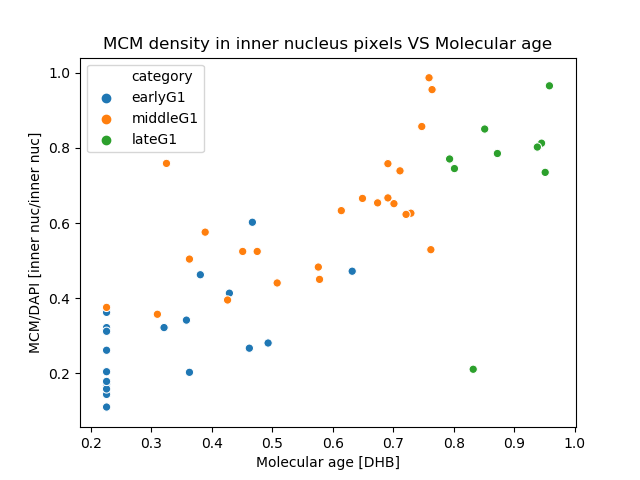

Text(0.5, 1.0, 'MCM density in inner nucleus pixels VS Molecular age')

In [166]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_total/newdatand.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [inner nuc/inner nuc]')
plt.title('MCM density in inner nucleus pixels VS Molecular age')

In [167]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#16', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 17.	How does MCM/DAPI changes in inner heterochromatin molecular time?

<IPython.core.display.Javascript object>


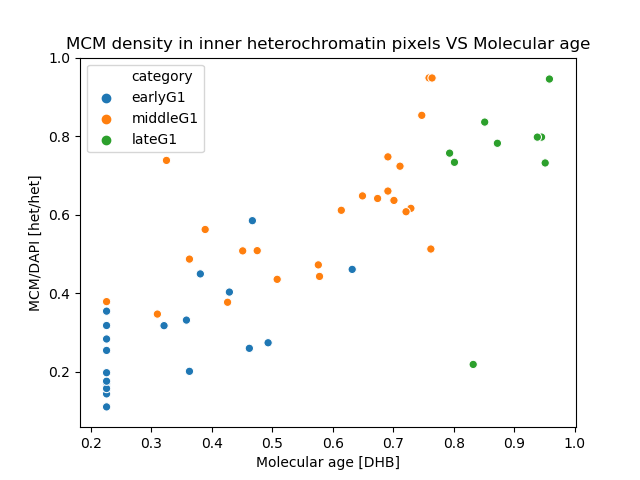

Text(0.5, 1.0, 'MCM density in inner heterochromatin pixels VS Molecular age')

In [168]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_het/newdatand.inner_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in inner heterochromatin pixels VS Molecular age')

In [169]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#17', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 18. 	How does MCM/DAPI changes in inner euterochromatin molecular time?

<IPython.core.display.Javascript object>


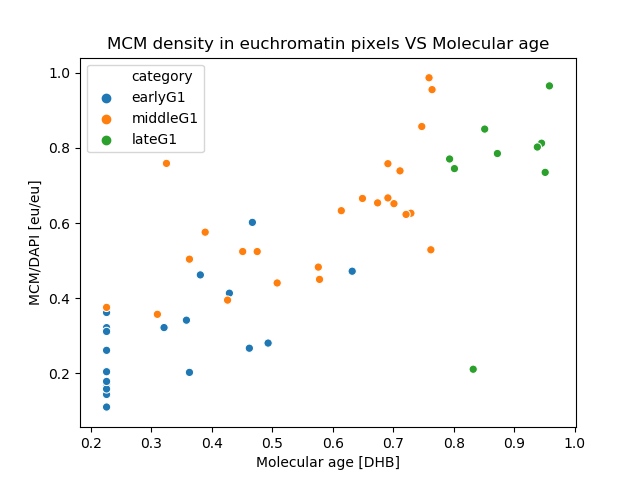

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [170]:
%matplotlib notebook
newdatand['temp']=newdatand.inner_mcm_eu/newdatand.inner_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

In [171]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#18', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

# outer shell of the nucleus

## 19.	How is heterochromtin/nucleus outer volume changing with molecular age?

<IPython.core.display.Javascript object>


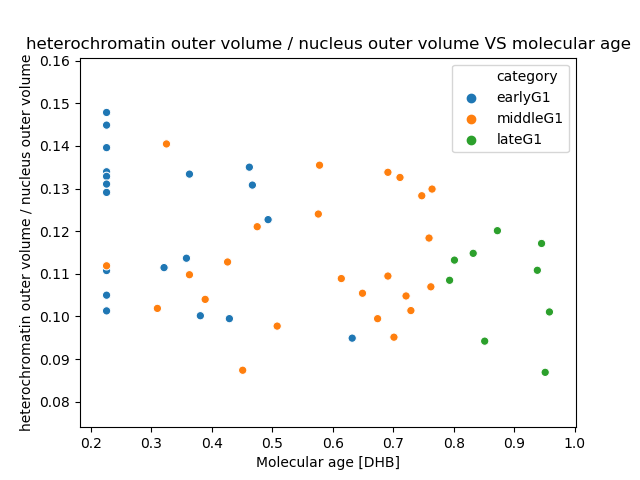

Text(0.5, 1.0, 'heterochromatin outer volume / nucleus outer volume VS molecular age')

In [172]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_vol_het/newdatand.outer_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin outer volume / nucleus outer volume')
plt.title('heterochromatin outer volume / nucleus outer volume VS molecular age')

In [173]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#19', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 20. 	How is MCM signal in outer shell changing with molecular age? 

<IPython.core.display.Javascript object>


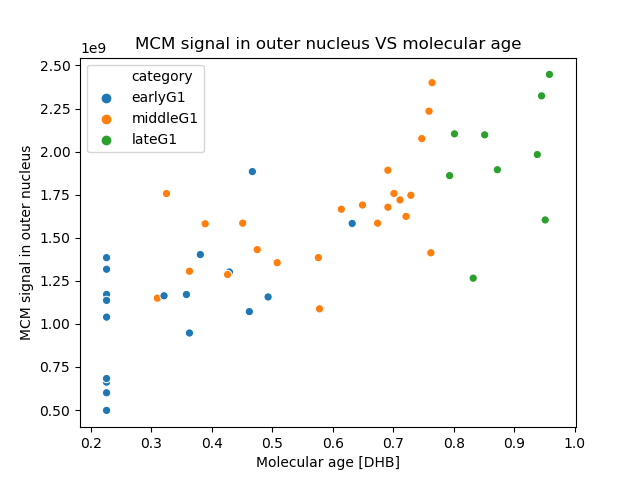

Text(0.5, 1.0, 'MCM signal in outer nucleus VS molecular age')

In [174]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_total',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer nucleus')
plt.title('MCM signal in outer nucleus VS molecular age')

In [175]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#20', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 21. 	How is MCM signal changing in outer heterochromatin with molecular age?

<IPython.core.display.Javascript object>


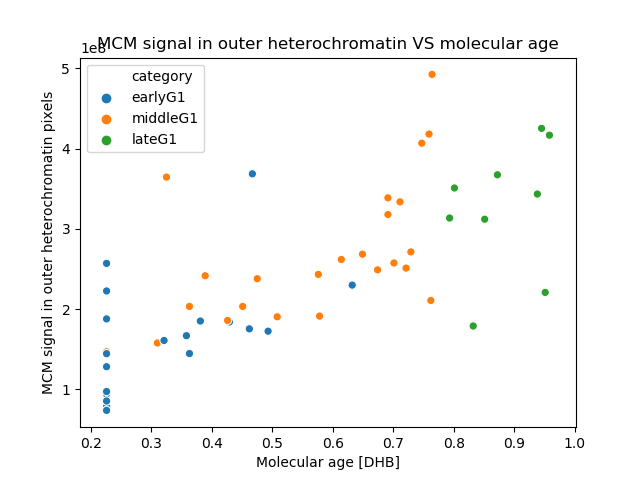

Text(0.5, 1.0, 'MCM signal in outer heterochromatin VS molecular age')

In [176]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_het',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer heterochromatin pixels')
plt.title('MCM signal in outer heterochromatin VS molecular age')

In [177]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#21', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 22. 	How is MCM signal changing in outer euchromatin with molecular age?

<IPython.core.display.Javascript object>


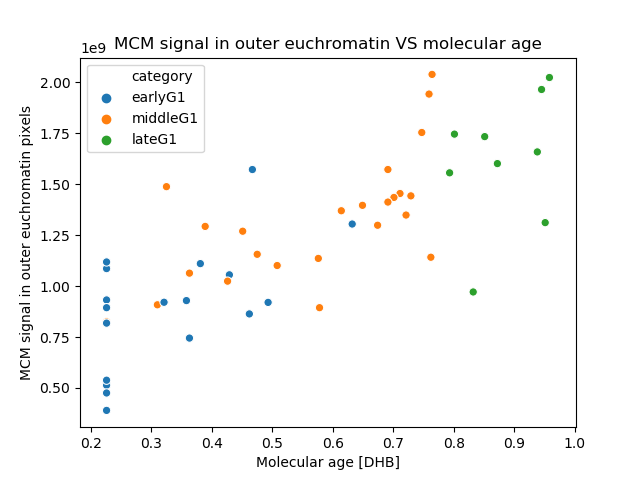

Text(0.5, 1.0, 'MCM signal in outer euchromatin VS molecular age')

In [178]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_eu',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer euchromatin pixels')
plt.title('MCM signal in outer euchromatin VS molecular age')

In [179]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#22', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 23.	How does a proportion of MCM loaded in outer heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


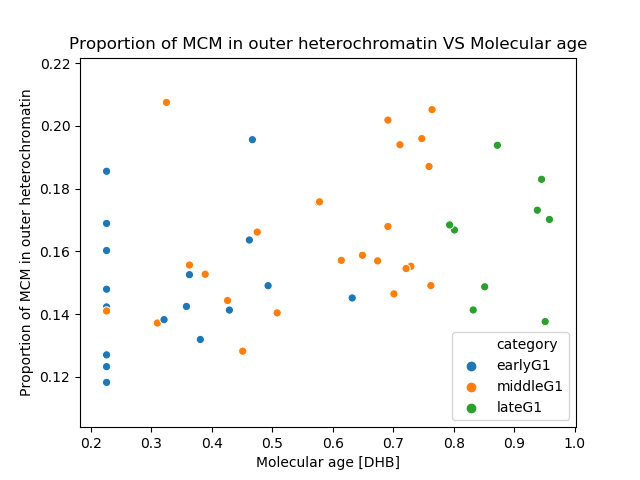

Text(0.5, 1.0, 'Proportion of MCM in outer heterochromatin VS Molecular age')

In [180]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_het/newdatand.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=newdatand.loc[['G1' in x for x in newdatand.category],:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer heterochromatin')
plt.title('Proportion of MCM in outer heterochromatin VS Molecular age')

In [181]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#23', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 24.	How does a proportion of MCM loaded in outer euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


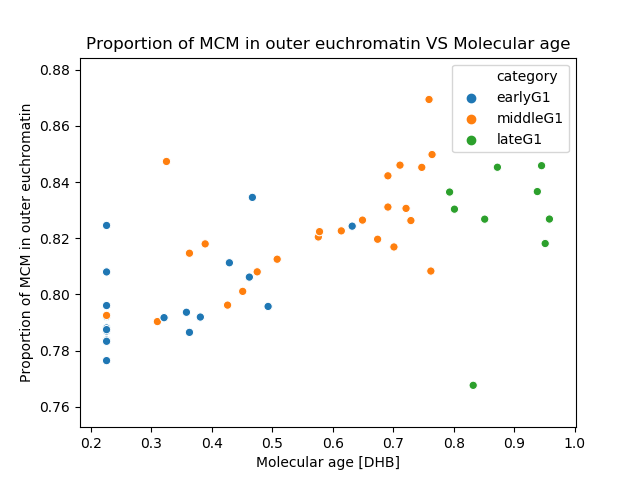

Text(0.5, 1.0, 'Proportion of MCM in outer euchromatin VS Molecular age')

In [182]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_eu/newdatand.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer euchromatin')
plt.title('Proportion of MCM in outer euchromatin VS Molecular age')

In [183]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#24', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 25.	How does MCM/DAPI in outer shell changes in molecular time?

<IPython.core.display.Javascript object>


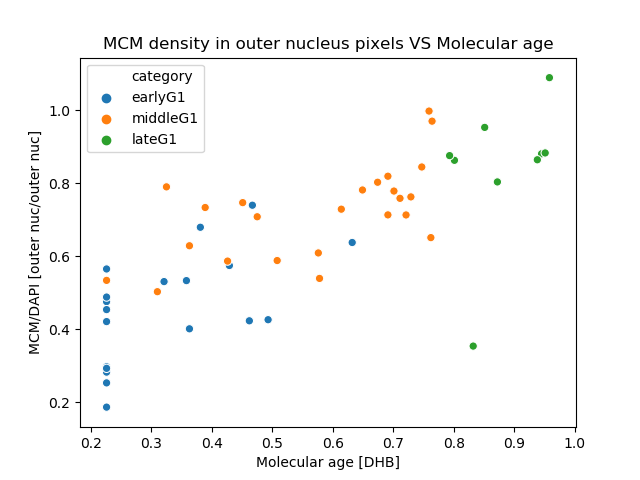

Text(0.5, 1.0, 'MCM density in outer nucleus pixels VS Molecular age')

In [184]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_total/newdatand.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [outer nuc/outer nuc]')
plt.title('MCM density in outer nucleus pixels VS Molecular age')

In [185]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#25', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 26.	How does MCM/DAPI changes in outer heterochromatin molecular time?

<IPython.core.display.Javascript object>


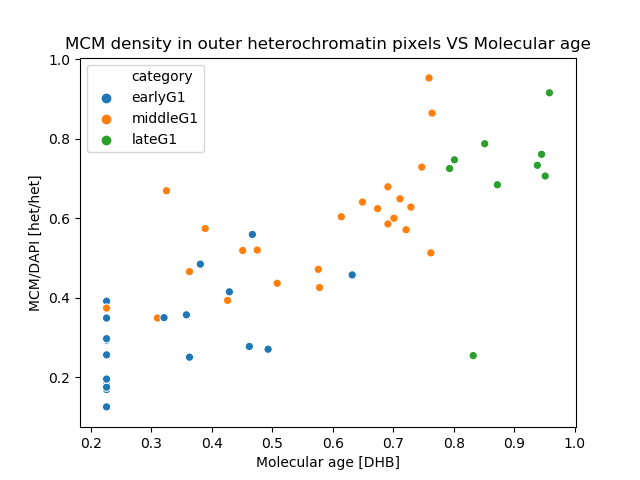

Text(0.5, 1.0, 'MCM density in outer heterochromatin pixels VS Molecular age')

In [186]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_het/newdatand.outer_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in outer heterochromatin pixels VS Molecular age')

In [187]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#26', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

## 27. 	How does MCM/DAPI changes in outer euterochromatin molecular time?

<IPython.core.display.Javascript object>


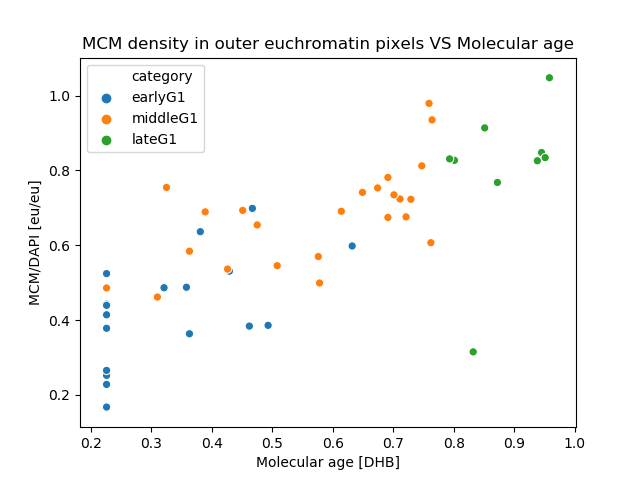

Text(0.5, 1.0, 'MCM density in outer euchromatin pixels VS Molecular age')

In [188]:
%matplotlib notebook
newdatand['temp']=newdatand.outer_mcm_eu/newdatand.outer_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=newdatand.loc[['G1' in x for x in newdatand.category],:], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in outer euchromatin pixels VS Molecular age')

In [189]:
x = np.array(newdatand.mol_age_mod)
y = np.array(newdatand.temp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x,y)
myTrendDatand=myTrendDatand.append(pd.Series(['#27', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendDatand.columns),ignore_index=True)

In [190]:
myTrendData

trendName         slope  intercept    rvalue    pvalue        stderr  \
0         #1 -8.576569e-07   0.200003 -0.173576  0.133736  5.656720e-07   
1         #2 -8.576569e-07   0.200003 -0.173576  0.133736  5.656720e-07   
2         #3 -8.576569e-07   0.200003 -0.173576  0.133736  5.656720e-07   
3         #4 -8.576569e-07   0.200003 -0.173576  0.133736  5.656720e-07   
4         #5  2.834260e-03   0.237730  0.051571  0.658176  6.380225e-03   
5         #6  5.937311e-03   0.849398  0.082519  0.478528  8.335573e-03   
6         #7  6.991298e-02   0.473688  0.121580  0.295455  6.635085e-02   
7         #8  9.218106e-02   0.403696  0.158107  0.172537  6.692337e-02   
8         #9  7.450792e-02   0.452089  0.127863  0.271012  6.718345e-02   
9        #10 -6.651720e-02   0.579201 -0.226083  0.049555  3.331637e-02   
10       #11 -6.651720e-02   0.579201 -0.226083  0.049555  3.331637e-02   
11       #12 -6.651720e-02   0.579201 -0.226083  0.049555  3.331637e-02   
12       #13 -6.651720e-02   0.579201 -0.226083  0.049555  3.331637e-02   
13       #14 -6.841585e-02   0.576556 -0.231422  0.044278  3.343366e-02   
14       #15  2.579335e-03   0.995434  0.173391  0.134158  1.703091e-03   
15       #16  1.045188e-01   0.433968  0.156254  0.177687  7.680327e-02   
16       #17  1.048157e-01   0.416600  0.163960  0.156988  7.330880e-02   
17       #18  1.047213e-01   0.433697  0.156561  0.176825  7.679728e-02   
18       #19 -1.958991e-02   0.178765 -0.518656  0.000002  3.754009e-03   
19       #20 -1.958991e-02   0.178765 -0.518656  0.000002  3.754009e-03   
20       #21 -1.958991e-02   0.178765 -0.518656  0.000002  3.754009e-03   
21       #22 -1.958991e-02   0.178765 -0.518656  0.000002  3.754009e-03   
22       #23 -1.728916e-02   0.212740 -0.251112  0.028666  7.747238e-03   
23       #24 -9.846277e-03   0.840392 -0.121447  0.295986  9.354961e-03   
24       #25  6.792832e-02   0.477488  0.121029  0.297663  6.476495e-02   
25       #26  8.505068e-02   0.401807  0.150223  0.195226  6.506820e-02   
26       #27  7.075414e-02   0.454320  0.124391  0.284345  6.560845e-02   
27       #27  7.075414e-02   0.454320  0.124391  0.284345  6.560845e-02   
28       #27 -6.676321e-06   0.200042 -0.100192  0.389156  7.707193e-06   

    rsquared  
0   0.030129  
1   0.030129  
2   0.030129  
3   0.030129  
4   0.002660  
5   0.006809  
6   0.014782  
7   0.024998  
8   0.016349  
9   0.051113  
10  0.051113  
11  0.051113  
12  0.051113  
13  0.053556  
14  0.030064  
15  0.024415  
16  0.026883  
17  0.024511  
18  0.269004  
19  0.269004  
20  0.269004  
21  0.269004  
22  0.063057  
23  0.014749  
24  0.014648  
25  0.022567  
26  0.015473  
27  0.015473  
28  0.010038

In [191]:
myTrendDatand

trendName     slope  intercept    rvalue        pvalue    stderr  rsquared
0         #2 -0.000007   0.200042 -0.100192  3.891555e-01  0.000008  0.010038
1         #3 -0.000007   0.200042 -0.100192  3.891555e-01  0.000008  0.010038
2         #4 -0.000007   0.200042 -0.100192  3.891555e-01  0.000008  0.010038
3         #5  0.006553   0.257651  0.076381  5.119571e-01  0.009944  0.005834
4         #6  0.007753   0.847750  0.105505  3.643726e-01  0.008495  0.011131
5         #7  0.046761   0.554755  0.081155  4.858551e-01  0.066761  0.006586
6         #8  0.083800   0.426448  0.144395  2.133239e-01  0.066758  0.020850
7         #9  0.053385   0.518707  0.092591  4.263101e-01  0.066736  0.008573
8        #10 -0.052633   0.627790 -0.278314  1.491726e-02  0.021116  0.077459
9        #11 -0.052633   0.627790 -0.278314  1.491726e-02  0.021116  0.077459
10       #12 -0.052633   0.627790 -0.278314  1.491726e-02  0.021116  0.077459
11       #13 -0.052633   0.627790 -0.278314  1.491726e-02  0.021116  0.077459
12       #14 -0.055095   0.636021 -0.291692  1.056934e-02  0.021002  0.085084
13       #15  0.001900   0.995366  0.173998  1.327802e-01  0.001250  0.030275
14       #16  0.095744   0.432094  0.153764  1.847842e-01  0.071523  0.023643
15       #17  0.096528   0.421616  0.157916  1.730628e-01  0.070166  0.024937
16       #18  0.095815   0.431924  0.153872  1.844728e-01  0.071525  0.023676
17       #19 -0.028547   0.134798 -0.583065  3.263176e-08  0.004624  0.339965
18       #20 -0.028547   0.134798 -0.583065  3.263176e-08  0.004624  0.339965
19       #21 -0.028547   0.134798 -0.583065  3.263176e-08  0.004624  0.339965
20       #22 -0.028547   0.134798 -0.583065  3.263176e-08  0.004624  0.339965
21       #23 -0.026148   0.172748 -0.358580  1.469174e-03  0.007913  0.128580
22       #24 -0.012109   0.815689 -0.156908  1.758579e-01  0.008860  0.024620
23       #25  0.041544   0.597150  0.073499  5.280525e-01  0.065529  0.005402
24       #26  0.070200   0.431643  0.128134  2.699901e-01  0.063163  0.016418
25       #27  0.045466   0.552890  0.080930  4.870704e-01  0.065094  0.006550